In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.distributions.empirical_distribution as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sea
import matplotlib.pyplot as plt

sea.set()

In [17]:
asset_list = ['BBVA','ELE','EZE','GAS','REP','SAN','TEF','ZEL']

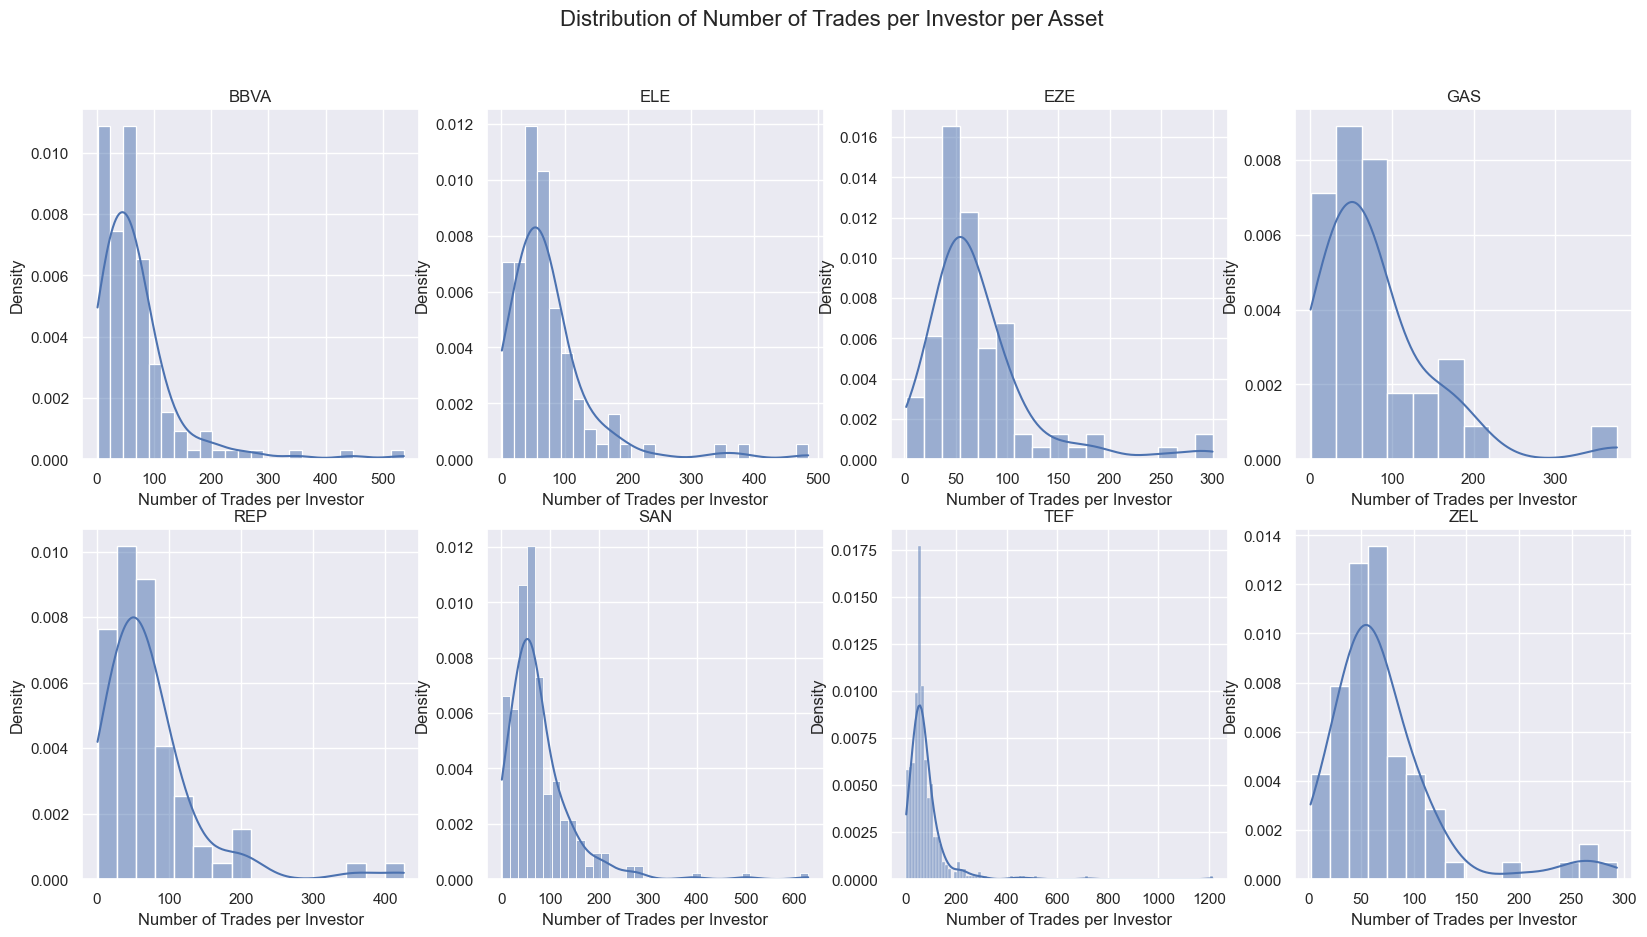

In [19]:
fig, axs = plt.subplots(2,4, figsize=(20,10))
fig.suptitle('Distribution of Number of Trades per Investor per Asset', fontsize=16)

for asset, ax in zip(asset_list, np.reshape(axs,-1)):
    data = pd.read_csv(f"../Data/Mapping-Individual-Behavior-in-Financial_Markets/{asset}_Investors.csv")
    data["difference"] = data["position"].diff().fillna(0)
    filtered_data = data[data["difference"] != 0]
    by_investor = filtered_data.groupby("investor_id").count()
    sea.histplot(by_investor["position"], stat="density", kde=True, ax=ax)
    ax.set_title(f"{asset}")
    ax.set_xlabel("Number of Trades per Investor")

In [30]:
for asset in asset_list:
    data = pd.read_csv(f"../Data/Mapping-Individual-Behavior-in-Financial_Markets/{asset}_Investors.csv")
    data["difference"] = data["position"].diff().fillna(0)
    filtered_data = data[data["difference"] != 0].asfreq("M")
    print(filtered_data.head())
    by_investor = filtered_data.groupby("investor_id")
    print(by_investor.head())
    

ValueError: cannot reindex on an axis with duplicate labels